# Load Data

In [ ]:
import pandas as pd

X_train = pd.read_csv('../data/processed/splits transformed/X_train_clean.csv', quoting= 1)
X_test = pd.read_csv('../data/processed//splits transformed/X_test_clean.csv', quoting=1)

y_train = pd.read_csv('../data/processed//splits/y_train.csv')
y_test = pd.read_csv('../data/processed//splits/y_test.csv')

# Preprocessing for Sequential Models

In [3]:
# cleaning
def clean_text(text):
    import regex as re
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

# train set cleaning
X_train['transformed_title'] = X_train['title'].apply(clean_text)
X_train['transformed_text'] = X_train['text'].apply(clean_text)
X_train['transformed_text_title_combined'] = X_train['transformed_text'] + " " + X_train['transformed_title']

# test set cleaning
X_test['transformed_title'] = X_test['title'].apply(clean_text)
X_test['transformed_text'] = X_test['text'].apply(clean_text)
X_test['transformed_text_title_combined'] = X_test['transformed_text'] + " " + X_test['transformed_title']

In [4]:
X_train.sample()

,title,text,transformed_title,transformed_text,transformed_text_title_combined
10404,BIZARRE! NANCY PELOSI Can’t Stop Giggling Abou...,Nancy Pelosi had a strange reaction to a repor...,bizarre nancy pelosi cant stop giggling about ...,nancy pelosi had a strange reaction to a repor...,nancy pelosi had a strange reaction to a repor...


In [5]:
X_test.sample()

,title,text,transformed_title,transformed_text,transformed_text_title_combined
35777,Nazareth cuts back Christmas celebrations to p...,"JERUSALEM (Reuters) - Nazareth, the Israeli Ar...",nazareth cuts back christmas celebrations to p...,jerusalem reuters nazareth the israeli arab c...,jerusalem reuters nazareth the israeli arab c...


In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Vocabulary Building
from tensorflow.keras.preprocessing.text import Tokenizer
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token='<UNK>')
tokenizer.fit_on_texts(X_train['transformed_text_title_combined'])

2025-08-31 19:02:29.190643: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756666949.415451      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756666949.483324      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [8]:
# Print top 10 words
for word, index in list(tokenizer.word_index.items())[:10]:
    print(word, index)

<UNK> 1
the 2
to 3
of 4
a 5
and 6
in 7
that 8
on 9
for 10


In [9]:
X_train_seq = tokenizer.texts_to_sequences(X_train['transformed_text_title_combined'])
X_test_seq = tokenizer.texts_to_sequences(X_test['transformed_text_title_combined'])

In [10]:
print(X_train_seq[0])

[111, 69, 2, 85, 68, 9, 213, 14, 2, 31, 272, 2379, 269, 87, 108, 936, 488, 248, 12, 112, 3099, 21, 1310, 6, 109, 23, 391, 4, 126, 2067, 2, 602, 4, 130, 12, 1, 85, 68, 366, 3352, 3607, 88, 362, 28, 5, 601, 340, 1435, 428, 468, 8, 2, 31, 433, 228, 3759, 2124, 42, 5, 252, 17, 106, 38, 141, 71, 1152, 4, 936, 488, 3099, 21, 1310, 24, 636, 85, 68]


In [11]:
len(X_train_seq[0])

76

In [12]:
decoded = tokenizer.sequences_to_texts(X_train_seq)
decoded[0]

'washington reuters the white house on thursday said the us justice departments investigation into hillary clintons email use is being driven by facts and should be free of political interference the rule of law is <UNK> white house spokesman josh earnest told reporters at a daily press briefing following reports that the us attorney general loretta lynch had a meeting with former president bill clinton probe of clintons email driven by facts not politics white house'

In [13]:
# sequence padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len = 200
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len)

In [14]:
X_train_padded[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,  111,   69,    2,   85,   68,    9,  213,   14,
          2,   31,  272, 2379,  269,   87,  108,  936,  488,  248,   12,
        112, 3099,   21, 1310,    6,  109,   23,  3

# Sequential Models

- RNN
- GRU
- LSTM

In [15]:
print(f"Shape of padded training data: {X_train_padded.shape}") 
print(f"Shape of padded test data: {X_test_padded.shape}")

Shape of padded training data: (35918, 200)
Shape of padded test data: (8980, 200)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense

# RNN
def create_rnn_model(max_words, embedding_dim, input_length):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=input_length))
    model.add(SimpleRNN(units=128))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# LSTM
def create_lstm_model(max_words, embedding_dim, input_length):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=input_length))
    model.add(LSTM(units=128))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# GRU
def create_gru_model(max_words, embedding_dim, input_length):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=input_length))
    model.add(GRU(units=128))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [17]:
# Define model parameters
max_words = 10000
embedding_dim = 128
input_length = 100
epochs = 5
batch_size = 64

# Train RNN model
rnn_model = create_rnn_model(max_words, embedding_dim, input_length)
print("Training RNN model...")
rnn_history = rnn_model.fit(X_train_padded, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
print(rnn_model.summary())

# # Train LSTM model
lstm_model = create_lstm_model(max_words, embedding_dim, input_length)
print("Training LSTM model...")
lstm_history = lstm_model.fit(X_train_padded, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
print(lstm_model.summary())

# Train GRU model
gru_model = create_gru_model(max_words, embedding_dim, input_length)
print("Training GRU model...")
gru_history = gru_model.fit(X_train_padded, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
print(gru_model.summary())

Training RNN model...
Epoch 1/5


2025-08-31 19:03:03.089504: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


449/449 ━━━━━━━━━━━━━━━━━━━━ 36s 73ms/step - accuracy: 0.7633 - loss: 0.4646 - val_accuracy: 0.9809 - val_loss: 0.0540
Epoch 2/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 33s 72ms/step - accuracy: 0.9895 - loss: 0.0343 - val_accuracy: 0.9797 - val_loss: 0.0679
Epoch 3/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 33s 73ms/step - accuracy: 0.9940 - loss: 0.0207 - val_accuracy: 0.9836 - val_loss: 0.0528
Epoch 4/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 33s 73ms/step - accuracy: 0.9976 - loss: 0.0075 - val_accuracy: 0.9884 - val_loss: 0.0407
Epoch 5/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 33s 73ms/step - accuracy: 0.9978 - loss: 0.0081 - val_accuracy: 0.9868 - val_loss: 0.0502


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,939,077 (15.03 MB)

 Trainable params: 1,313,025 (5.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,626,052 (10.02 MB)

None
Training LSTM model...
Epoch 1/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 120s 258ms/step - accuracy: 0.9066 - loss: 0.2026 - val_accuracy: 0.9876 - val_loss: 0.0361
Epoch 2/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 115s 256ms/step - accuracy: 0.9959 - loss: 0.0137 - val_accuracy: 0.9876 - val_loss: 0.0381
Epoch 3/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 117s 261ms/step - accuracy: 0.9970 - loss: 0.0096 - val_accuracy: 0.9866 - val_loss: 0.0461
Epoch 4/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 115s 257ms/step - accuracy: 0.9973 - loss: 0.0076 - val_accuracy: 0.9861 - val_loss: 0.0450
Epoch 5/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 116s 259ms/step - accuracy: 0.9998 - loss: 0.0013 - val_accuracy: 0.9854 - val_loss: 0.0555


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,235,141 (16.16 MB)

 Trainable params: 1,411,713 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,823,428 (10.77 MB)

None
Training GRU model...
Epoch 1/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 118s 253ms/step - accuracy: 0.8812 - loss: 0.2285 - val_accuracy: 0.9844 - val_loss: 0.0450
Epoch 2/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 113s 251ms/step - accuracy: 0.9945 - loss: 0.0182 - val_accuracy: 0.9841 - val_loss: 0.0453
Epoch 3/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 115s 256ms/step - accuracy: 0.9983 - loss: 0.0071 - val_accuracy: 0.9794 - val_loss: 0.0793
Epoch 4/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 113s 252ms/step - accuracy: 0.9980 - loss: 0.0060 - val_accuracy: 0.9840 - val_loss: 0.0581
Epoch 5/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 116s 259ms/step - accuracy: 0.9995 - loss: 0.0020 - val_accuracy: 0.9833 - val_loss: 0.0817


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,137,605 (15.78 MB)

 Trainable params: 1,379,201 (5.26 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,758,404 (10.52 MB)

None


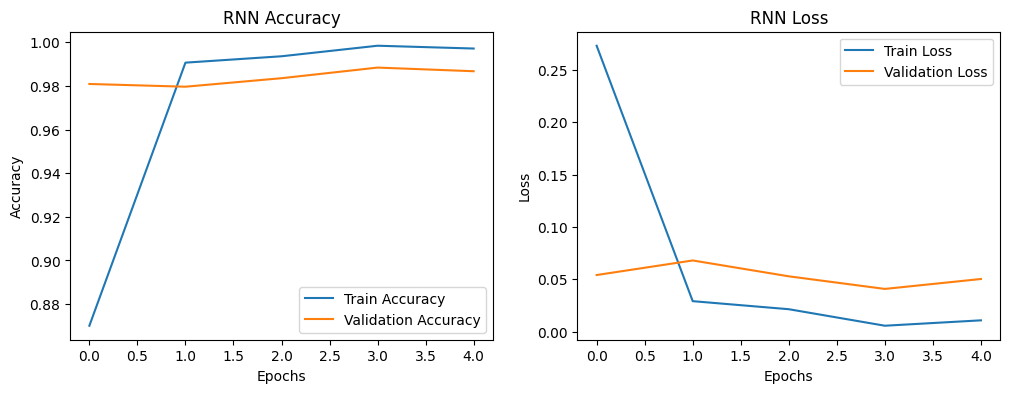

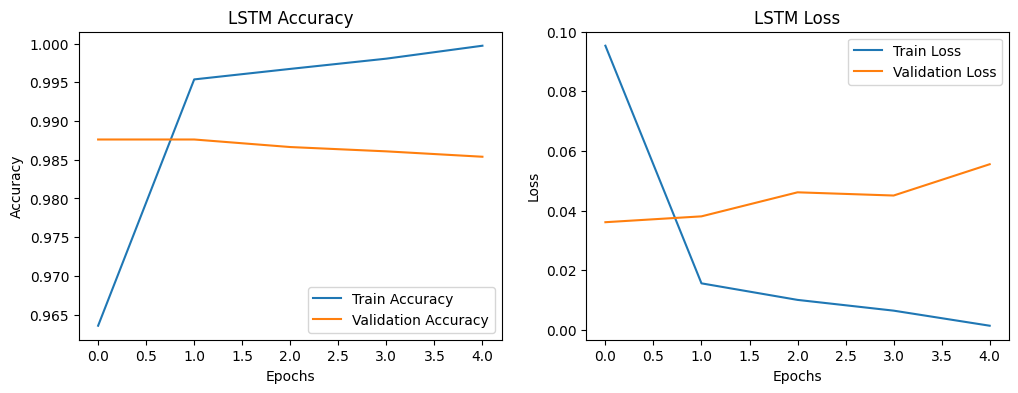

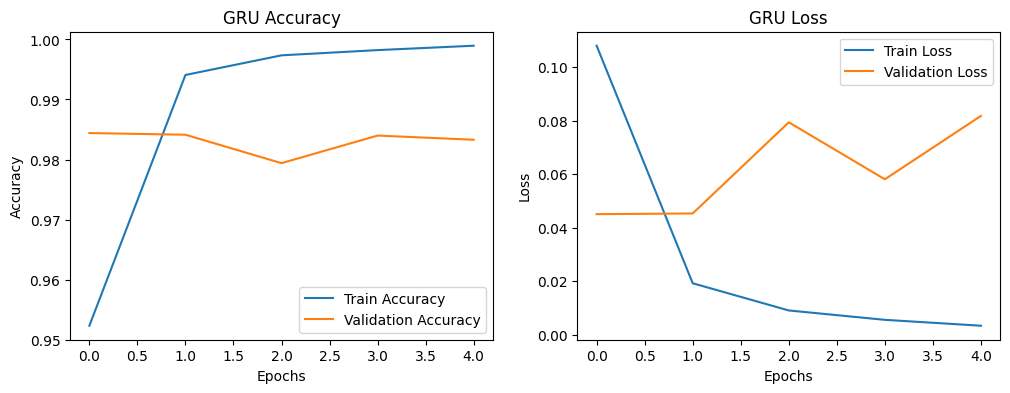

In [18]:
import matplotlib.pyplot as plt
# Function to plot training history
def plot_history(history, model_name):
    # Plotting accuracy
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plotting the training history for each model
plot_history(rnn_history, 'RNN')
plot_history(lstm_history, 'LSTM')
plot_history(gru_history, 'GRU')


In [19]:
# Evaluate each model on the test set and print the accuracy
print("Evaluating models...")

# Evaluate RNN model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_padded, y_test)
print(f"RNN Accuracy: {rnn_accuracy:.4f}")

# # Evaluate LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_padded, y_test)
print(f"LSTM Accuracy: {lstm_accuracy:.4f}")

# Evaluate GRU model
gru_loss, gru_accuracy = gru_model.evaluate(X_test_padded, y_test)
print(f"GRU Accuracy: {gru_accuracy:.4f}")

Evaluating models...
281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9860 - loss: 0.0505
RNN Accuracy: 0.9860
281/281 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - accuracy: 0.9856 - loss: 0.0489
LSTM Accuracy: 0.9847
281/281 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.9874 - loss: 0.0624
GRU Accuracy: 0.9870


In [35]:
# Example test samples
samples = [
    "Breaking: Government confirms new policy to reduce taxes starting next year.",  # True-like
    "Shocking news! Alien spaceship lands in New York and government covers it up.",  # Fake-like
    "President announces major healthcare reforms to support low-income families.",  # True-like
    "You won’t believe this! Miracle cure for cancer discovered in secret lab.",  # Fake-like
]

# Preprocess samples (apply same cleaning, tokenization, and padding)
cleaned_samples = [clean_text(text) for text in samples]
sequences = tokenizer.texts_to_sequences(cleaned_samples)
padded = pad_sequences(sequences, maxlen=max_len)

# Predict
predictions = gru_model.predict(padded)

for text, pred in zip(samples, predictions):
    label = "True" if pred >= 0.000003 else "Fake"
    print(f"Text: {text}\nPredicted: {label} ({pred[0]:.10f})\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Text: Breaking: Government confirms new policy to reduce taxes starting next year.
Predicted: True (0.0000035978)

Text: Shocking news! Alien spaceship lands in New York and government covers it up.
Predicted: Fake (0.0000014322)

Text: President announces major healthcare reforms to support low-income families.
Predicted: True (0.0000042320)

Text: You won’t believe this! Miracle cure for cancer discovered in secret lab.
Predicted: Fake (0.0000001406)



In [ ]:
# Saving Models
import joblib
joblib.dump(rnn_model, '../models/rnn.pkl')
joblib.dump(lstm_model, '../models/lstm.pkl')
joblib.dump(gru_model, '../models/gru.pkl')

['gru.pkl']